# Anova
Análise de variância

* É um teste de hipótese
* Compara três ou mais grupos
* Uma variável quantitativa e uma ou mais variáveis categóricas
* Busca a variação entre grupos comparando a variação dentro dos grupo

In [5]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [8]:
tratamento = pd.read_csv('./dados/anova.csv', sep=';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


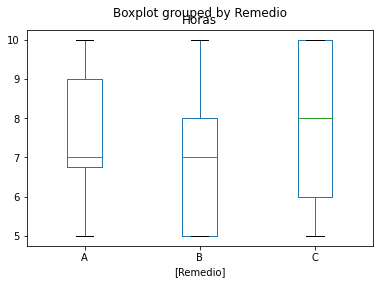

In [22]:
tratamento.boxplot(by='Remedio', grid=False)

## *Há variação significativa para o tempo do remédio fazer efeito?*

In [25]:
modelo1 = ols('Horas ~ Remedio', data= tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)

# Para valor p > alfa (PR(>F)), Hipotese nula de que não há diferença significativa
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [26]:
modelo2 = ols('Horas ~ Remedio  * Sexo', data= tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo2)

# Para valor p > alfa (PR(>F)), Hipotese nula de que não há diferença significativa
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN
